<a href="https://colab.research.google.com/github/alifele/Glucose-Instrument/blob/main/Glucose_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [54]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/GlucoseTests
%cd Mollaheydar\ glucose\ results

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/1s__9Ls68_9n0NYqKX9jJZLYu36kG8FOn/GlucoseTests
/content/gdrive/.shortcut-targets-by-id/1s__9Ls68_9n0NYqKX9jJZLYu36kG8FOn/GlucoseTests/Mollaheydar glucose results


In [66]:
!ls

Ahmad_1_02-02_after.json     Shahab_11_02-16_after.json
Ahmad_1_02-02_after.png      Shahab_11_02-16_after.png
Ahmad_1_02-02_before.json    Shahab_12_02-17_before.json
Ahmad_1_02-02_before.png     Shahab_12_02-17_before.png
Ahmad_2_02-10_after.json     Shahab_2_02-07_after.json
Ahmad_2_02-10_after.png      Shahab_2_02-07_after.png
Ahmad_2_02-10_before.json    Shahab_2_02-07_before.json
Ahmad_2_02-10_before.png     Shahab_2_02-07_before.png
Ahmad_3_02-11_before.json    Shahab_3_02-09_after.json
Ahmad_3_02-11_before.png     Shahab_3_02-09_after.png
Ahmad_4_02-14_after.json     Shahab_3_02-09_afterr.json
Ahmad_4_02-14_after.png      Shahab_3_02-09_before.json
Ahmad_5_02-14_before.json    Shahab_3_02-09_before.png
Ahmad_5_02-14_before.png     Shahab_4_02-10_after.json
Ahmad_5_02-15_before.json    Shahab_4_02-10_after.png
Ahmad_5_02-15_before.png     Shahab_4_02-10_before.json
Ahmad_6_02-15_before.json    Shahab_5_02-11_before.json
Ahmad_6_02-15_before.png     Shahab_5_02-11_before.png
Ahma

In [67]:
df = pd.read_json("Ahmad_1_02-02_after.json")

In [68]:
df.head()

,name,phone,GlucoseVal,red\r\n,blue\r\n,white\r\n,pink\r\n,orange\r\n
0,Ahmad_1_02-02_after,1653,126,151,112,554,875,131
1,Ahmad_1_02-02_after,1653,126,171,109,556,869,134
2,Ahmad_1_02-02_after,1653,126,171,111,553,865,133
3,Ahmad_1_02-02_after,1653,126,173,114,553,867,133
4,Ahmad_1_02-02_after,1653,126,176,111,556,870,132


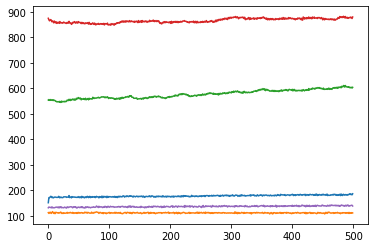

In [59]:
colors = ["red\r\n","blue\r\n","white\r\n","pink\r\n","orange\r\n"]
for elem in colors:
  df[elem].plot()

#Feature extraction
Dataframe format:
```python
[red_mean, blue_mean, white_mean, pink_mean, orange_mean, red_std, blue_std, white_std, pink_std, orange_std, gvalue]
```


In [77]:
colors = ["red\r\n","blue\r\n","white\r\n","pink\r\n","orange\r\n"]
DATA_regression = []
for elem in os.listdir():
  if "json" in elem:
    print(elem)
    df = pd.read_json(elem)
    data = []
    for color in colors:
      data.append(df[color].mean())
    for color in colors:
      data.append(df[color].std())
    data.append(df['GlucoseVal'].mean())
    DATA_regression.append(data)


Zahra_1_02-02_before.json
Ahmad_1_02-02_before.json
Elahe_1_02-02_before.json
Hosein_1_02-02_before.json
Shahab_1_02-02_before.json
Hosein_1_02-02_after.json
Zahra_1_02-02_after.json
Ahmad_1_02-02_after.json
Shahab_1_02-02_after.json
Elahe_1_02-02_after.json
Shahab_2_02-07_before.json
Elahe_2_02-07-before.json
Elahe_2_02-07-beforee.json
Elahe_2_02-07_after.json
Elahe_2_02-07_afterr.json
Elahe_2_02-07_afterrr.json
Shahab_2_02-07_after.json
Nahid_1_02-09_before.json
Shirin_1_02-09_before.json
Zahra_2_02-09_before.json
Shahab_3_02-09_before.json
Morteza_1_02-09_before.json
Elahe_3_02-09_before.json
Shirin_1_02-09_after.json
Shahab_3_02-09_after.json
Shahab_3_02-09_afterr.json
Nahid_1_02-09_after.json
Zahra_2_02-09_after.json
Elahe_3_02-09_after.json
Zahra_3_02-10_before.json
Zohre_1_02-10_before.json
Nahid_2_02-10_before.json
Zahra_3_02-10_after.json
Zohre_1_02-10_after.json
Nahid_3_02-10_before.json
Elahe_4_02-10_before.json
Shahab_4_02-10_before.json
Shirin_2_02-10_before.json
Nahid_4_0

In [112]:
colors = ["red\r\n","blue\r\n","white\r\n","pink\r\n","orange\r\n"]
DATA_class= []
for elem in os.listdir():
  if "json" in elem:
    #print(elem)
    df = pd.read_json(elem)
    data = []
    for color in colors:
      data.append(df[color].mean())
    for color in colors:
      data.append(df[color].std())
    gval = df['GlucoseVal'].mean() 
    # low --> 1, med -->2, high --> 3
    #print(gval)
    if (gval <100):
      status = 1
    elif (gval >120):
      status = 3
    else:
      status = 2

    data.append(status)
    DATA_class.append(data)


# Model Training
## Support Vector Machine (SVM)

In [113]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

spliting features and labels

In [114]:
DATA_class = np.array(DATA_class)
X = DATA_class[:,:-1]
y = DATA_class[:,-1]

x_train, x_test, y_train, y_test = train_test_split(X,y)

In [117]:
svm_clf = SVC()
svm_clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [118]:
predict = svm_clf.predict(x_test)
predict

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3.])

In [119]:
y_test

array([3., 3., 2., 3., 2., 2., 2., 3., 3., 2., 1., 2., 3., 3., 3., 3., 2.,
       3., 3., 2., 2., 3., 2., 3., 2., 3., 3., 3., 1., 2., 1., 2., 3., 2.,
       2., 3.])

In [120]:
confusion_matrix(y_test, predict)

array([[ 0,  0,  3],
       [ 0,  0, 15],
       [ 0,  0, 18]])

In [122]:
len(y)

143